In [2]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
import numpy as np

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
#from functions import *

#always remember your magic function if using Jupyter
%matplotlib inline

%pylab inline

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
os.chdir('/Users/alexandrejacqueline/Data_Science/P5_DATA')

olist_customers      = pd.read_csv('olist_customers_dataset.csv', sep=',')
olist_geolocation    = pd.read_csv('olist_geolocation_dataset.csv', sep=',')
olist_order_items    = pd.read_csv('olist_order_items_dataset.csv', sep=',')
olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv', sep=',')
olist_order_revieuws = pd.read_csv('olist_order_reviews_dataset.csv', sep=',')
olist_orders         = pd.read_csv('olist_orders_dataset.csv', sep=',')
olist_products       = pd.read_csv('olist_products_dataset.csv', sep=',')
olist_sellers        = pd.read_csv('olist_sellers_dataset.csv', sep=',')
product_cat_name_tra = pd.read_csv('product_category_name_translation.csv', sep=',')

Populating the interactive namespace from numpy and matplotlib


In [3]:
df=[olist_customers,olist_geolocation,olist_order_items,olist_order_payments,olist_order_revieuws,olist_orders ,olist_products ,olist_sellers,product_cat_name_tra]

for i in df:
    print(i.shape)

(99441, 5)
(1000163, 5)
(112650, 7)
(103886, 5)
(99224, 7)
(99441, 8)
(32951, 9)
(3095, 4)
(71, 2)


In [4]:
import warnings

warnings.filterwarnings('ignore')

for i in [olist_customers,olist_geolocation ,olist_order_items,olist_order_payments,olist_order_revieuws,olist_orders , olist_products,olist_sellers,product_cat_name_tra]: print(i)


In [5]:
list_of_df = [olist_customers,olist_geolocation,olist_orders,olist_order_items,\
             olist_order_payments,olist_order_revieuws,olist_products,olist_sellers,\
             product_cat_name_tra]

for x in list_of_df:
    print(x.isna().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id  

In [6]:
for x in list_of_df:
    print(x.duplicated(keep=False).sum())

0
390005
0
0
0
0
0
0
0


In [7]:
olist_geolocation.drop_duplicates(inplace=True)
olist_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [8]:
#os.getcwd()

## olist_customers

In [9]:
olist_customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [10]:
olist_customers["customer_id"].count()

99441

In [11]:
olist_customers["customer_id"].nunique()

99441

In [12]:
olist_customers["customer_unique_id"].count()

99441

In [13]:
olist_customers["customer_unique_id"].nunique()

96096

In [14]:
 olist_customers.groupby("customer_unique_id")["customer_id"].count()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    1
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: customer_id, Length: 96096, dtype: int64

In [15]:
olist_customers.isna().count()

customer_id                 99441
customer_unique_id          99441
customer_zip_code_prefix    99441
customer_city               99441
customer_state              99441
dtype: int64

In [16]:
 olist_customers["customer_zip_code_prefix"].nunique()

14994

In [17]:
 olist_customers["customer_city"].nunique()

4119

In [18]:
 olist_customers["customer_state"].nunique()

27

<AxesSubplot:xlabel='customer_state'>

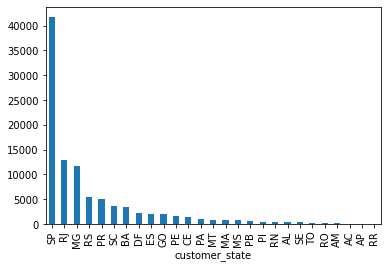

In [19]:
olist_customers.groupby("customer_state")["customer_unique_id"].count().sort_values(ascending=False).plot.bar()

In [20]:
 olist_customers.groupby(["customer_state"], as_index=False)["customer_city"].count()

,customer_state,customer_city
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380
5,CE,1336
6,DF,2140
7,ES,2033
8,GO,2020
9,MA,747


In [21]:
 olist_customers.groupby(["customer_state"], as_index=False)["customer_unique_id"].count()

,customer_state,customer_unique_id
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380
5,CE,1336
6,DF,2140
7,ES,2033
8,GO,2020
9,MA,747


In [22]:
 customer_city  = olist_customers.groupby(["customer_city"])["customer_unique_id"].count().sort_values(ascending=False)

In [23]:
customer_city

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

In [24]:
 olist_customers.groupby(["customer_city"], as_index=False)["customer_unique_id"].count().sort_values(by="customer_unique_id",ascending=False)

,customer_city,customer_unique_id
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
...,...,...
1578,ibiara,1
3164,rio espera,1
3163,rio dos indios,1
3162,rio dos cedros,1


In [25]:
 olist_customers["customer_unique_id"].value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [26]:
 olist_customers["customer_unique_id"].nunique()

96096

In [27]:
# customer id est un id provisoire. 

##  olist_order_items

In [28]:
olist_order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [29]:
olist_order_items['order_id'].nunique()

98666

In [30]:
olist_order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [31]:
olist_order_items["order_item_id"].count()

112650

In [32]:
olist_order_items["product_id"].nunique()

32951

In [33]:
olist_order_items["seller_id"].nunique()

3095

In [34]:
olist_order_items.groupby("seller_id")["product_id"].count().sort_values(ascending=False)

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
5f57db27027655e6c6a391601daa0258       1
5e25c632f9db6cfb8bc100421c2737b6       1
5e106d93b717c2682b9383da480364a1       1
d36b07fd3c5088e477a72d1fccfe29d4       1
7d81e74a4755b552267cd5e081563028       1
Name: product_id, Length: 3095, dtype: int64

In [35]:
olist_order_items.groupby("product_id")["seller_id"].count().sort_values(ascending=False)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
6ca99f05e9c1952a6597264e87f01378      1
6ca54e191592a843087a042b0665d7ef      1
6ca5428af5edb5066b1966ad58501b60      1
6ca32b4631431cb1fe976880797a0f5c      1
fffe9eeff12fcbd74a2f2b007dde0c58      1
Name: seller_id, Length: 32951, dtype: int64

In [36]:
# à voir le même produit peut il être vendue par plusieur vendeur ?


In [37]:
olist_order_items.groupby("seller_id")["price"].count().sort_values(ascending=False)

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
5f57db27027655e6c6a391601daa0258       1
5e25c632f9db6cfb8bc100421c2737b6       1
5e106d93b717c2682b9383da480364a1       1
d36b07fd3c5088e477a72d1fccfe29d4       1
7d81e74a4755b552267cd5e081563028       1
Name: price, Length: 3095, dtype: int64

In [38]:
olist_order_items.groupby("product_id")["price"].count().sort_values(ascending=False)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
6ca99f05e9c1952a6597264e87f01378      1
6ca54e191592a843087a042b0665d7ef      1
6ca5428af5edb5066b1966ad58501b60      1
6ca32b4631431cb1fe976880797a0f5c      1
fffe9eeff12fcbd74a2f2b007dde0c58      1
Name: price, Length: 32951, dtype: int64

In [39]:
# Valeur du fret à exploiter selon la région ??
# Shipping limit date - data ??

## olist_order_payments

In [40]:
olist_order_payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [41]:
olist_order_payments['order_id'].nunique()

99440

In [42]:
olist_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


## olist_order_revieuws

In [43]:
olist_order_revieuws.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [44]:
olist_order_revieuws['review_id'].nunique()

98410

In [45]:
olist_order_revieuws['order_id'].nunique()

98673

## olist_orders

In [46]:
olist_orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [47]:
olist_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [48]:
olist_orders["customer_id"].nunique()

99441

In [49]:
olist_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [50]:
#Créer Taux de traitement dans les délais 5 10 ++

## olist_products

In [51]:
olist_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [52]:
olist_products['product_id'].nunique()

32951

In [53]:
olist_products['product_category_name'].nunique()

73

In [54]:
olist_products.groupby("product_category_name")["product_id"].count().sort_values(ascending=False)

product_category_name
cama_mesa_banho                                   3029
esporte_lazer                                     2867
moveis_decoracao                                  2657
beleza_saude                                      2444
utilidades_domesticas                             2335
automotivo                                        1900
informatica_acessorios                            1639
brinquedos                                        1411
relogios_presentes                                1329
telefonia                                         1134
bebes                                              919
perfumaria                                         868
fashion_bolsas_e_acessorios                        849
papelaria                                          849
cool_stuff                                         789
ferramentas_jardim                                 753
pet_shop                                           719
eletronicos                                

In [55]:
olist_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [56]:
#Descriptif des différentes catégorie de produit 

## olist_sellers

In [57]:
olist_sellers.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [58]:
olist_sellers['seller_id'].nunique()

3095

In [59]:
olist_sellers['seller_id'].count()

3095

In [60]:
olist_sellers['seller_zip_code_prefix'].count()

3095

In [61]:
olist_sellers['seller_zip_code_prefix'].nunique()

2246

In [62]:
olist_sellers['seller_city'].count()

3095

In [63]:
olist_sellers['seller_city'].nunique()

611

In [64]:
olist_sellers['seller_state'].count()

3095

In [65]:
olist_sellers['seller_state'].nunique()

23

## product_cat_name_tra

In [66]:
product_cat_name_tra

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [67]:
product_cat_name_tra.shape

(71, 2)

# Jointure   

In [68]:
# Join datasets
data = olist_orders.merge(olist_customers, on="customer_id").merge(olist_order_items, on="order_id").merge(olist_products, on="product_id").merge(product_cat_name_tra , on="product_category_name").merge(olist_order_payments, on="order_id").merge(olist_sellers , on="seller_id").merge(olist_order_revieuws, on="order_id")

In [69]:
data.shape

(115609, 40)

In [70]:
data.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,1,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48


In [71]:
data.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_c

In [72]:
df_nan = data.isna().sum().sort_values(ascending=False)
df_nan

review_comment_title             101808
review_comment_message            66703
order_delivered_customer_date      2400
order_delivered_carrier_date       1195
order_approved_at                    14
product_length_cm                     1
product_height_cm                     1
product_width_cm                      1
product_weight_g                      1
payment_installments                  0
product_category_name_english         0
payment_sequential                    0
payment_type                          0
order_id                              0
payment_value                         0
seller_zip_code_prefix                0
seller_city                           0
review_id                             0
review_score                          0
review_creation_date                  0
seller_state                          0
product_description_lenght            0
product_photos_qty                    0
customer_id                           0
order_status                          0


<AxesSubplot:title={'center':'Proportion de NaN par variable (%)'}>

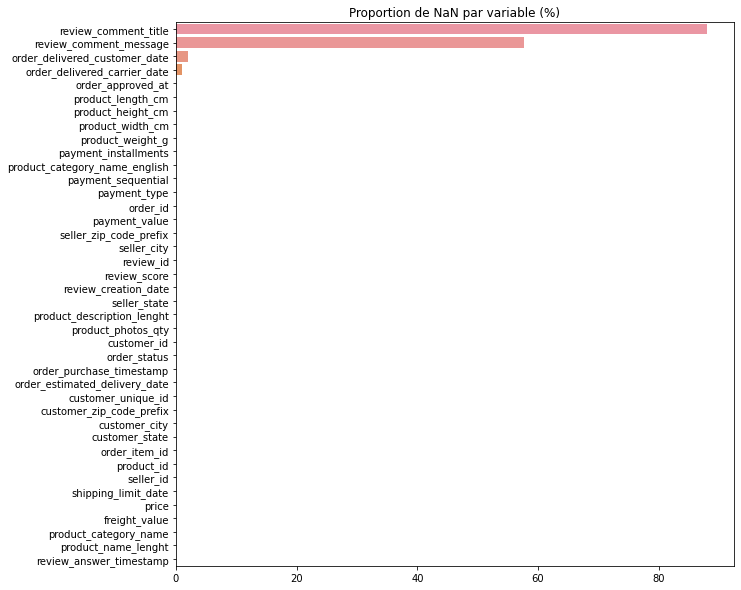

In [73]:
plt.figure(figsize=(10,10))
plt.title('Proportion de NaN par variable (%)')
sns.barplot(x=df_nan.values/data.shape[0]*100, y=df_nan.index)

In [74]:
data.groupby("seller_state")["price"].count().sort_values(ascending=False)

seller_state
SP    82417
MG     9014
PR     8964
RJ     4906
SC     4221
RS     2224
DF      937
BA      698
GO      537
PE      461
MA      403
ES      374
MT      147
CE      103
MS       59
RN       56
PB       40
RO       14
PI       12
SE       10
PA        8
AM        3
AC        1
Name: price, dtype: int64

In [75]:
data.groupby("product_category_name_english")["price"].count().sort_values(ascending=False)

product_category_name_english
bed_bath_table                             11847
health_beauty                               9944
sports_leisure                              8942
furniture_decor                             8743
computers_accessories                       8105
housewares                                  7331
watches_gifts                               6161
telephony                                   4692
garden_tools                                4558
auto                                        4356
toys                                        4246
cool_stuff                                  3964
perfumery                                   3575
baby                                        3178
electronics                                 2827
stationery                                  2607
fashion_bags_accessories                    2159
pet_shop                                    2020
office_furniture                            1773
consoles_games                         

In [76]:
top_categ_by_revenue = data.groupby("product_category_name_english").agg({'order_id':'nunique','payment_value':'sum'}).sort_values("payment_value", ascending=False)[:10]
top_categ_by_revenue.rename(columns={"order_id":"NumOfOrders", "payment_value":"Revenues"}, inplace=True)

In [77]:
top_categ_by_revenue

,NumOfOrders,Revenues
product_category_name_english,,
bed_bath_table,9313,1725465.67
health_beauty,8770,1646292.53
computers_accessories,6649,1592611.66
furniture_decor,6398,1427214.01
watches_gifts,5576,1420682.17
sports_leisure,7669,1390581.87
housewares,5843,1091709.15
garden_tools,3496,834757.45
auto,3877,802254.74


In [78]:
data["shipping_limit_date"] = data["shipping_limit_date"].apply(pd.to_datetime)
data["order_purchase_timestamp"] = data["order_purchase_timestamp"].apply(pd.to_datetime)
data["order_approved_at"] = data["order_approved_at"].apply(pd.to_datetime)
data["order_delivered_carrier_date"] = data["order_delivered_carrier_date"].apply(pd.to_datetime)
data["order_delivered_customer_date"] = data["order_delivered_customer_date"].apply(pd.to_datetime)
data["order_estimated_delivery_date"] = data["order_estimated_delivery_date"].apply(pd.to_datetime)

Text(0.5, 1.0, 'TOP 10 states by num of orders')

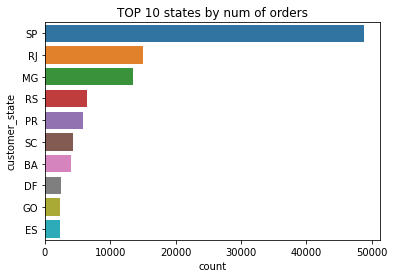

In [79]:
top_orders_cities = data.groupby("customer_state")["order_id"].count().reset_index().sort_values("order_id", ascending=False)
top_orders_cities.rename(columns={"order_id":"count"}, inplace=True)
ax = sns.barplot(x="count", y="customer_state", data=top_orders_cities[:10])
ax.set_title("TOP 10 states by num of orders")

Text(0.5, 1.0, 'TOP 10 cities by revenue generation')

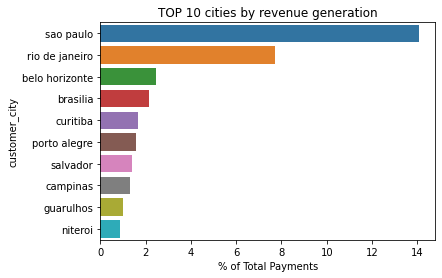

In [80]:
top_ordersbyvalue_cities = data.groupby("customer_city")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)
top_ordersbyvalue_cities["% of Total Payments"] = (top_ordersbyvalue_cities["payment_value"] / top_ordersbyvalue_cities["payment_value"].sum()) * 100
top_ordersbyvalue_cities["Cum % of Total Payments"] = top_ordersbyvalue_cities["% of Total Payments"].cumsum() 
ax = sns.barplot(x="% of Total Payments", y="customer_city", data=top_ordersbyvalue_cities[:10])
ax.set_title("TOP 10 cities by revenue generation")

Text(0.5, 1.0, 'Top 10 Customers by total paid')

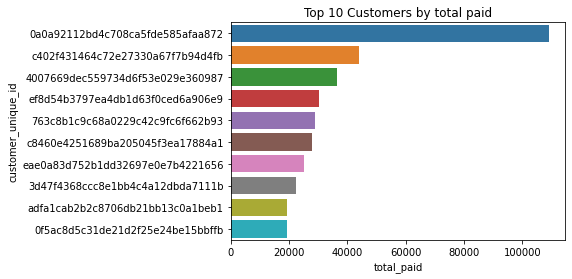

In [81]:
# Customers wiht highest cum orders (in payments)
top_customers = data.groupby("customer_unique_id")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)
top_customers.rename(columns={"payment_value":"total_paid"}, inplace=True)
top_customers["% of Total Sales"] = (top_customers["total_paid"] / top_customers["total_paid"].sum()) * 100
top_customers["Cum % of Total Sales"] = top_customers["% of Total Sales"].cumsum() 
top_customers.rename(columns={"payment_value" : "total_paid"}, inplace=True)
ax = sns.barplot(x="total_paid", y="customer_unique_id", data=top_customers[:10])
ax.set_title("Top 10 Customers by total paid")

In [82]:
olist_orders["order_purchase_timestamp"] = pd.to_datetime(olist_orders["order_purchase_timestamp"])


In [83]:
#time 

olist_orders["order_purchase_timestamp"] = pd.to_datetime(olist_orders["order_purchase_timestamp"])
orderbyhour = olist_orders.groupby(olist_orders["order_purchase_timestamp"].dt.hour)["order_id"].count().reset_index().sort_values(by="order_purchase_timestamp", ascending=False)
orderbyhour.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Hour of Day"}, inplace=True)

Text(0.5, 1.0, 'N° of Orders by hour')

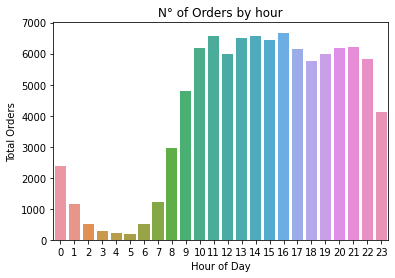

In [84]:
# Visualize data
ax = sns.barplot(x="Hour of Day", y="Total Orders", data=orderbyhour)
ax.set_title("N° of Orders by hour")

In [85]:
# Orders by day of the week
orderbydow = data.groupby(data["order_purchase_timestamp"].dt.day_name())["order_id"].count().reset_index()
orderbydow.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Weekday Name"}, inplace=True)
orderbydow = orderbydow.sort_values(by="Total Orders", ascending=False)

Text(0.5, 1.0, 'N° of Orders by DOW')

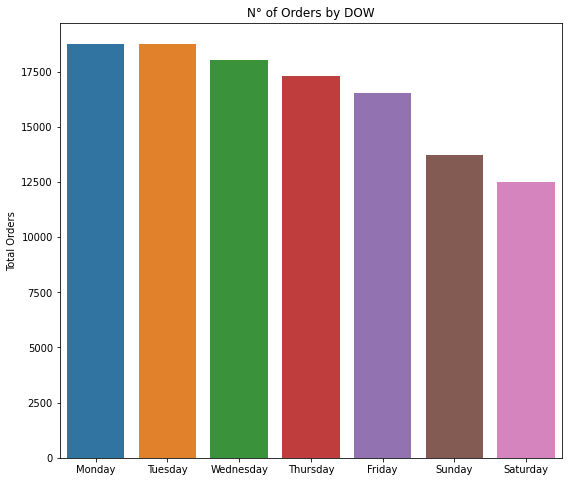

In [86]:
plt.figure(figsize = (9,8))
ax = sns.barplot(x="Weekday Name", y="Total Orders", data=orderbydow)
ax.set_xlabel('')
ax.set_title("N° of Orders by DOW")

In [87]:
#highestTTDstates = data.groupby("customer_state")["TimeToDeliveryinDays"].mean().dropna().sort_values(ascending=False).reset_index()
#highestTTDstates = highestTTDstates[:10]
#ax = sns.barplot(y="customer_state", x="TimeToDeliveryinDays", data=highestTTDstates)

In [88]:
#Revieuw Score 
#Delevery time 
#RFM

In [89]:
data['review_score'].value_counts()

5    65374
4    21951
1    14546
3     9718
2     4020
Name: review_score, dtype: int64

<AxesSubplot:xlabel='review_score', ylabel='count'>

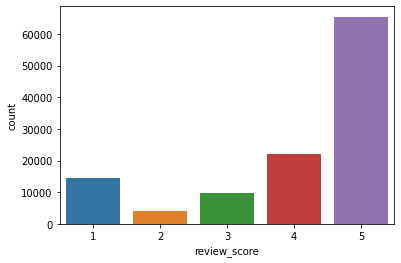

In [90]:
sns.countplot(x="review_score", data=data)

<AxesSubplot:xlabel='payment_type', ylabel='count'>

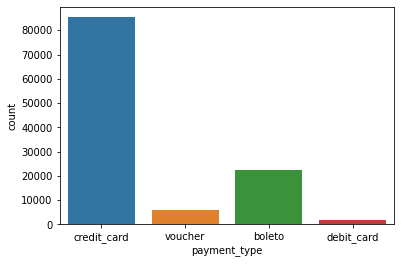

In [91]:
sns.countplot(x="payment_type" ,data=data)

In [92]:
# voucher =  bon d'achat
# boleto  = billetterie

#Inclure RFM dans KMEANS. 

In [93]:
olist_order_revieuws

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [94]:
df_bis = (data.groupby('customer_unique_id').agg(
    nb_commandes=('order_id', 'count'), score_moy=('review_score', 'mean'),
    nb_paiements=('payment_installments', 'mean'),
    nb_produits=('order_item_id', 'mean'),
    recence=('time_delta', 'min'),
    montant_total=('order_total_cost', 'sum')))


KeyError: "Column(s) ['order_total_cost', 'time_delta'] do not exist"